**Author**: CodeForAll  
**License**: MIT License

---


# Experiment: Bode Plot Analysis of Mass-Spring-Damper System

## Objective:
The objective of this experiment was to explore the **frequency response** of a **mass-spring-damper system** by plotting its **Bode plot** and analyzing the **magnitude** and **phase** across different frequencies. We also examined how varying the **damping coefficient** influences the system's stability, resonance, and gain margin.

## Background:
A **mass-spring-damper system** is a classic example in control theory and mechanical systems, used to model the dynamics of a mass attached to a spring and damper. The system is governed by the second-order differential equation:

$$
m\ddot{x} + c\dot{x} + kx = F(t)
$$

where:
- \( m \) is the mass,
- \( c \) is the damping coefficient,
- \( k \) is the spring constant,
- \( x \) is the displacement of the mass,
- \( F(t) \) is the external force applied.

The **Bode plot** is a graphical representation of the system's frequency response, showing how the system reacts to sinusoidal inputs at various frequencies. It consists of:
- **Magnitude plot**: Shows how the amplitude of the output signal changes with frequency.
- **Phase plot**: Shows how the phase of the output signal changes relative to the input signal.
-------
## Methodology:

### 1. **System Setup**:
We used a Python script to model the mass-spring-damper system as a transfer function:

$$
G(s) = \frac{1}{ms^2 + cs + k}
$$

The transfer function represents the system's response to an external input. We varied the damping coefficient \( c \) to observe its effects on the system’s behavior.

### 2. **Transfer Function Definition**:
We defined the system as follows:
- Mass, \( m = 1 kg \),
- Spring constant, \( k = 2 N/m \),
- Damping coefficient \( c \) varied over a range of values to observe its impact on the system’s behavior.

### 3. **Bode Plot Generation**:
Using Python's `scipy.signal` library, we generated the **Bode plot** for different values of the damping coefficient \( c \) by:
- Defining the system’s transfer function.
- Using `signal.bode` to calculate the magnitude and phase response.
- Plotting the results on a logarithmic scale for frequency.

### 4. **Analysis**:
We analyzed the following aspects of the system’s behavior:
- **Magnitude Response**: Observed the system's response across a range of frequencies, focusing on the peak response at the resonance frequency.
- **Phase Response**: Observed how the phase of the system’s output shifts with frequency.
- **Effect of Damping**: By varying the damping coefficient, we noted how the system's **resonance** and **gain margin** changed. A higher damping coefficient reduced the peak at resonance, while a lower damping coefficient resulted in a sharper peak.
  
### 5. **Gain Margin and Stability**:
We used the **gain margin** to assess the stability of the system:
- A system is **stable** if the gain margin is positive, meaning the system does not exhibit excessive amplification of certain frequencies.
- An **unstable system** can show an increasing magnitude at high frequencies (above 0 dB), which might lead to uncontrollable oscillations.
------


c = 0.001: Gain Margin = inf dB → stable (no -180° crossover)
c = 0.1: Gain Margin = inf dB → stable (no -180° crossover)
c = 1.0: Gain Margin = inf dB → stable (no -180° crossover)
c = 5.0: Gain Margin = inf dB → stable (no -180° crossover)
c = 10.0: Gain Margin = inf dB → stable (no -180° crossover)
c = 1000.0: Gain Margin = inf dB → stable (no -180° crossover)


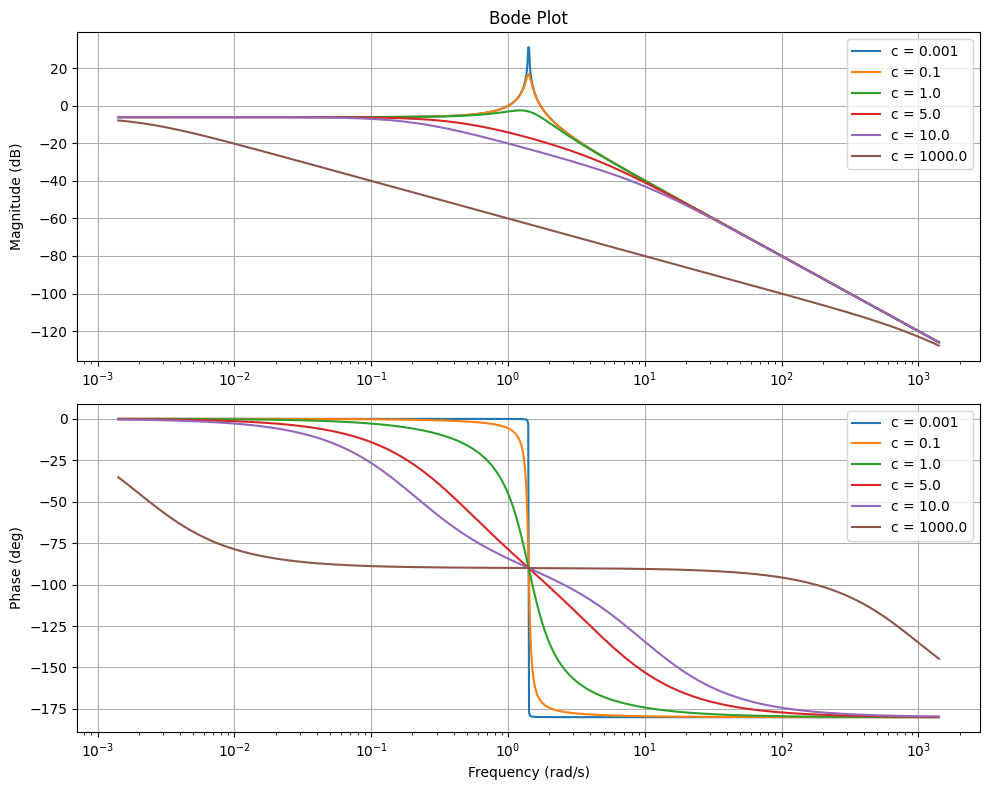

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import interp1d

# System parameters
m, k = 1.0, 2.0

def plot_bode_with_gain_margin(c_values):
    plt.figure(figsize=(10, 8))
    
    for c in c_values:
        # Transfer function
        system = signal.TransferFunction([1], [m, c, k])
        
        # Frequency range (centered around natural frequency)
        wn = np.sqrt(k/m)
        w = np.logspace(np.log10(wn)-3, np.log10(wn)+3, 1000)
        w, mag, phase = signal.bode(system, w)
        
        # Plot
        plt.subplot(2, 1, 1)
        plt.semilogx(w, mag, label=f'c = {c}')
        plt.subplot(2, 1, 2)
        plt.semilogx(w, phase, label=f'c = {c}')
        
        # --- Gain Margin Calculation ---
        phase_crossings = np.where(np.diff(np.sign(phase + 180)))[0]
        if len(phase_crossings) > 0:
            f_phase = interp1d(phase[phase_crossings[0]:phase_crossings[0]+2], 
                              w[phase_crossings[0]:phase_crossings[0]+2], 
                              kind='linear')
            phase_cross_freq = f_phase(-180)
            mag_at_phase_cross = np.interp(phase_cross_freq, w, mag)
            gain_margin = -mag_at_phase_cross
            stability = "stable" if gain_margin > 0 else "unstable"
        else:
            phase_cross_freq = None
            gain_margin = np.inf
            stability = "stable (no -180° crossover)"
        
        print(f"c = {c}: Gain Margin = {gain_margin:.2f} dB → {stability}")
    
    # Plot formatting
    plt.subplot(2, 1, 1)
    plt.title('Bode Plot')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.ylabel('Phase (deg)')
    plt.xlabel('Frequency (rad/s)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

c_values = [0.001, 0.1, 1.0, 5.0, 10.0, 1000.0]
plot_bode_with_gain_margin(c_values)

## Results:

### 1. **Effect of Damping**:
- **Low damping (\( c = 0.1 \))**: A sharp peak at the resonance frequency with high amplification. The system showed strong oscillations at this frequency.
- **High damping (\( c = 10.0 \))**: The peak at resonance was significantly reduced, and the system showed a more gradual response across frequencies.

### 2. **Magnitude Response**:
- At **low frequencies**, the magnitude was typically below 0 dB (attenuated).
- At **resonance**, the magnitude increased significantly, with the peak being more pronounced at lower damping.
- At **high frequencies**, the magnitude generally decreased, indicating attenuation of the response, but with insufficient damping, the system's response could remain amplified.

### 3. **Phase Response**:
- The phase shifted **90 degrees** at low frequencies, gradually changing towards **-180 degrees** as the frequency increased.
- At **resonance**, the phase shift was near **-90 degrees**, showing maximum system displacement.
  
### 4. **Stability**:
- Systems with higher damping coefficients exhibited better stability, with the magnitude decreasing at high frequencies.
- Systems with low damping (\( c = 0.001 \)) showed potential instability, as the gain margin could become positive and the magnitude did not decrease at high frequencies.

------

## Conclusion:
- The **Bode plot** proved to be an effective tool for understanding the frequency response of a **mass-spring-damper system**.
- **Damping** plays a critical role in determining the system's **resonance**, **gain margin**, and **stability**. Higher damping leads to a more stable system, while lower damping results in sharper peaks at resonance, which could lead to instability.
- The **gain margin** is crucial for determining system stability, and a system with excessive gain at high frequencies can lead to **uncontrolled oscillations**.

--------

